In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
citypath = 'Resources/city_data.csv'
ridepath = 'Resources/ride_data.csv'
city_csv = pd.read_csv(citypath)
ride_csv = pd.read_csv(ridepath)
city_ride_data = pd.merge(ride_csv, city_csv, how='left', on='city')
city_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


In [2]:
average_fares = city_ride_data.groupby("city").mean()[["fare"]]
average_fares = average_fares.rename(columns={"fare": "Average Fare ($) Per City"})
total_rides = city_ride_data.groupby("city").count()[["ride_id"]]
total_rides = total_rides.rename(columns={"ride_id": "Total Number of Rides Per City"})
total_rides = average_fares.join(total_rides)
total_rides = pd.merge(total_rides, city_csv, left_index=True, right_on='city')
total_rides = total_rides.rename(columns={"driver_count": "Total Number of Drivers Per City", "type": "City Type","city": "City"})
total_rides_urban = total_rides.loc[total_rides['City Type'] == "Urban"]
total_rides_suburban = total_rides.loc[total_rides['City Type'] == "Suburban"]
total_rides_rural = total_rides.loc[total_rides['City Type'] == "Rural"]

Bubble Plot of Ride Sharing Data


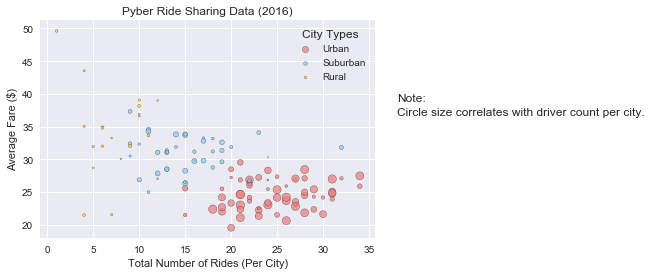

In [3]:
print("Bubble Plot of Ride Sharing Data")
seaborn.set()
plt.scatter(total_rides_urban["Total Number of Rides Per City"], total_rides_urban["Average Fare ($) Per City"], label="Urban", c="lightcoral", edgecolors="black", alpha=0.75, s=total_rides_urban["Total Number of Drivers Per City"])
plt.scatter(total_rides_suburban["Total Number of Rides Per City"], total_rides_suburban["Average Fare ($) Per City"], label="Suburban", c="lightskyblue", edgecolors="black", alpha=0.75, s=total_rides_suburban["Total Number of Drivers Per City"])
plt.scatter(total_rides_rural["Total Number of Rides Per City"], total_rides_rural["Average Fare ($) Per City"], label="Rural", c="gold", edgecolors="black", alpha=0.75, s=total_rides_rural["Total Number of Drivers Per City"])
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend(title="City Types")
plt.figtext(.95, 0.6, "Note:")
plt.figtext(.95, 0.55, "Circle size correlates with driver count per city.")
plt.show()

Total Fares by City Type


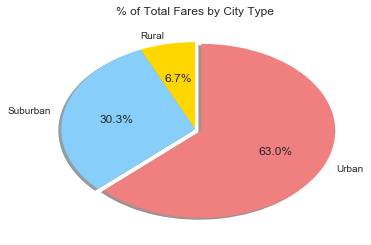

In [4]:
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.05)
total_fares = city_ride_data.groupby("type").sum()
print("Total Fares by City Type")
plt.title("% of Total Fares by City Type")
plt.pie(total_fares["fare"], explode=explode, labels=total_fares.index, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.show()

Total Rides by City Type


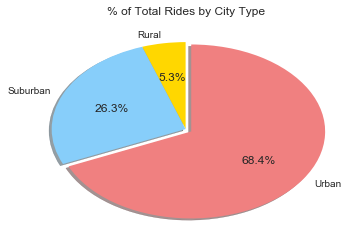

In [5]:
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.05)
total_city_rides = city_ride_data.groupby("type").count()
print("Total Rides by City Type")
plt.title("% of Total Rides by City Type")
plt.pie(total_city_rides["ride_id"], explode=explode, labels=total_city_rides.index, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.show()

Total Drivers by City Type


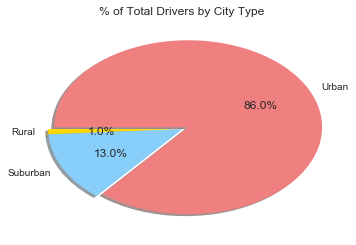

In [6]:
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.05)
total_city_drivers = city_ride_data.groupby("type").sum()
print("Total Drivers by City Type")
plt.title("% of Total Drivers by City Type")
plt.pie(total_city_drivers["driver_count"], explode=explode, labels=total_city_drivers.index, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180)
plt.show()